In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from IPython.display import display

#import data

fname = './data/X_station_coord_2nn_imputed_by_day.csv'
df = pd.read_csv(fname,parse_dates=['date'],infer_datetime_format=True)
d_sub_station = df[df['number_sta'] == 14066001 ]

In [23]:
#preview of time data for 1 station
display(d_sub_station[0:30])
d_sub_station.dtypes

,Id,number_sta,wind_speed,temperature,dew_point,humidity,wind_direction,precip,month,timestamp,latitude,longitude,height_sta,ground_truth,date
0,14066001_0,14066001,3.913750,280.333750,278.514583,88.591667,146.500000,0.2,1,1.451606e+09,49.334,-0.431,2.0,3.4,2016-01-01
1,14066001_1,14066001,8.041250,282.936667,279.997500,82.300000,205.625000,3.4,1,1.451693e+09,49.334,-0.431,2.0,11.7,2016-01-02
2,14066001_10,14066001,5.408750,279.557917,277.497917,86.750000,209.541667,6.0,1,1.452470e+09,49.334,-0.431,2.0,1.0,2016-01-11
3,14066001_100,14066001,4.296250,282.112917,277.944583,76.408333,134.958333,11.6,4,1.460246e+09,49.334,-0.431,2.0,5.6,2016-04-10
4,14066001_101,14066001,1.754583,282.805000,281.003333,88.745833,167.208333,5.6,4,1.460333e+09,49.334,-0.431,2.0,3.2,2016-04-11
5,14066001_102,14066001,2.407083,282.479583,280.120000,85.595833,131.291667,3.2,4,1.460419e+09,49.334,-0.431,2.0,0.8,2016-04-12
6,14066001_103,14066001,1.790833,282.803750,280.428750,85.625000,114.791667,0.8,4,1.460506e+09,49.334,-0.431,2.0,9.1,2016-04-13
7,14066001_104,14066001,3.090833,283.611250,280.944583,84.291667,174.583333,9.1,4,1.460592e+09,49.334,-0.431,2.0,0.6,2016-04-14
8,14066001_105,14066001,6.333333,284.374167,280.703750,79.120833,226.041667,0.6,4,1.460678e+09,49.334,-0.431,2.0,1.8,2016-04-15
9,14066001_106,14066001,4.773750,281.986250,278.361667,78.712500,239.041667,1.8,4,1.460765e+09,49.334,-0.431,2.0,0.2,2016-04-16


Id                        object
number_sta                 int64
wind_speed               float64
temperature              float64
dew_point                float64
humidity                 float64
wind_direction           float64
precip                   float64
month                      int64
timestamp                float64
latitude                 float64
longitude                float64
height_sta               float64
ground_truth             float64
date              datetime64[ns]
dtype: object

Using the data with NaNs filled with imputation we'll do a spectral analysis of the temperature,humidity, precip values and date to get seasonality.

#Toy example for seasonality basics

In [82]:
# Generate some data
np.random.seed(0)
n = 1500
dates = np.array('2005-01-01', dtype=np.datetime64) + np.arange(n)
data = 12*np.sin(2*np.pi*np.arange(n)/365) + np.random.normal(12, 2, 1500)
df = pd.DataFrame({'data': data}, index=dates)
type(dates[0])

numpy.datetime64

In [ ]:
# Reproduce the example in OP
sd = seasonal_decompose(df, model='additive', period=365)
sd.plot()

Now let's adapt this to our dataset so we can get a seasonal decomposition

In [60]:
#order data by date
d_sub_station = d_sub_station.sort_values(by="date",ignore_index =True)
display(d_sub_station)

,Id,number_sta,wind_speed,temperature,dew_point,humidity,wind_direction,precip,month,timestamp,latitude,longitude,height_sta,ground_truth,date
0,14066001_0,14066001,3.913750,280.333750,278.514583,88.591667,146.500000,0.2,1,1.451606e+09,49.334,-0.431,2.0,3.4,2016-01-01
1,14066001_1,14066001,8.041250,282.936667,279.997500,82.300000,205.625000,3.4,1,1.451693e+09,49.334,-0.431,2.0,11.7,2016-01-02
2,14066001_2,14066001,5.430417,281.101667,278.997500,86.604167,195.250000,11.7,1,1.451779e+09,49.334,-0.431,2.0,0.6,2016-01-03
3,14066001_3,14066001,6.715417,281.055000,277.900833,80.645833,212.666667,0.6,1,1.451866e+09,49.334,-0.431,2.0,0.4,2016-01-04
4,14066001_4,14066001,5.957083,281.255833,278.484167,82.750000,205.041667,0.4,1,1.451952e+09,49.334,-0.431,2.0,3.0,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,14066001_724,14066001,5.599167,281.367917,279.224583,86.358333,195.208333,3.6,12,1.514160e+09,49.334,-0.431,2.0,9.1,2017-12-25
725,14066001_725,14066001,5.769583,279.871667,277.818333,86.887500,210.750000,9.1,12,1.514246e+09,49.334,-0.431,2.0,4.4,2017-12-26
726,14066001_726,14066001,10.327917,278.977917,275.216250,77.454167,290.625000,4.4,12,1.514333e+09,49.334,-0.431,2.0,2.4,2017-12-27
727,14066001_727,14066001,4.840000,277.596250,274.480000,80.670833,257.208333,2.4,12,1.514419e+09,49.334,-0.431,2.0,3.2,2017-12-28


In [86]:
# Get a subset of the data with only temperature for a starter
# Necessary to transform to numpy before transforming index into datetime index
dates = d_sub_station['date'].to_numpy()
data = d_sub_station['temperature'].to_numpy()
df_temp = pd.DataFrame({'temperature': data},index= dates)

df_temp

,temperature
2016-01-01,280.333750
2016-01-02,282.936667
2016-01-03,281.101667
2016-01-04,281.055000
2016-01-05,281.255833
...,...
2017-12-25,281.367917
2017-12-26,279.871667
2017-12-27,278.977917
2017-12-28,277.596250


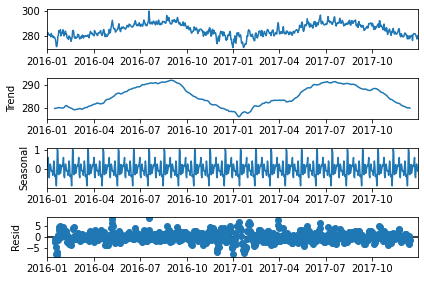

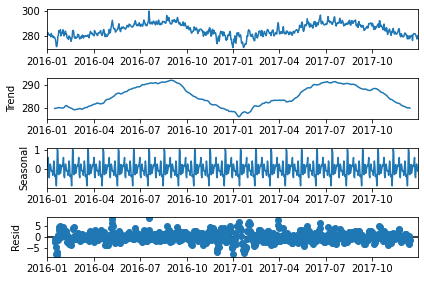

In [94]:
# With a period of a month
sd = seasonal_decompose(df_temp, model='additive', period=30)
sd.plot()

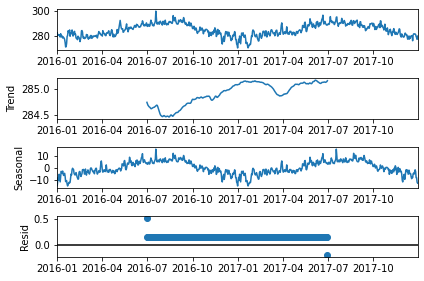

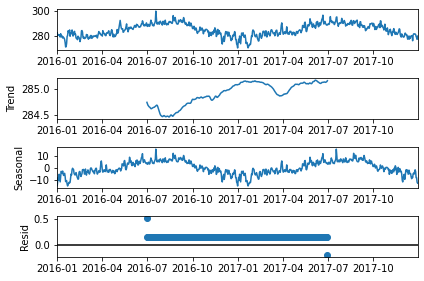

In [96]:
# With a period of a year
sd = seasonal_decompose(df_temp, model='additive', period=364)
sd.plot()